In [2]:

from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


xxx = 321
print(xxx)

321


In [ ]:
class AgentState(TypedDict):
    num1: int
    num2: int
    op1: str
    num3: int
    num4: int
    op2: str
    res1: int
    res2: int


def adder(state: AgentState) -> AgentState:
    """Adds two numbers"""
    state["res1"] = state["num1"] + state["num2"]

    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtracts two numbers"""
    state["res1"] = state["num1"] - state["num2"]

    return state

def decide_next(state: AgentState) -> str:
    """Decides the next node"""
    if state["op1"] == "+":
        return "add_op"
    elif state["op1"] == "-":
        return "subtarct_op"
    
def adder2(state: AgentState) -> AgentState:
    """Adds two numbers"""
    state["res2"] = state["num3"] + state["num4"]

    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtracts two numbers"""
    state["res2"] = state["num3"] - state["num4"]

    return state

graph = StateGraph(AgentState)

def decide_next2(state: AgentState) -> str:
    """Decides the next node"""
    if state["op2"] == "+":
        return "add_op2"
    elif state["op2"] == "-":
        return "subtarct_op2"

graph.add_node("add_node1", adder)
graph.add_node("subtarct_node1", subtractor)
graph.add_node("router1", lambda state:state)
graph.add_node("add_node2", adder2)
graph.add_node("subtarct_node2", subtractor)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decide_next,
    {
        "add_op": "add_node1",
        "subtarct_op": "subtarct_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtarct_node1", "router2")
graph.add_conditional_edges(
    "router2",
    decide_next2,
    {
        "add_op2": "add_node2",
        "subtarct_op2": "subtarct_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtarct_node2", END)

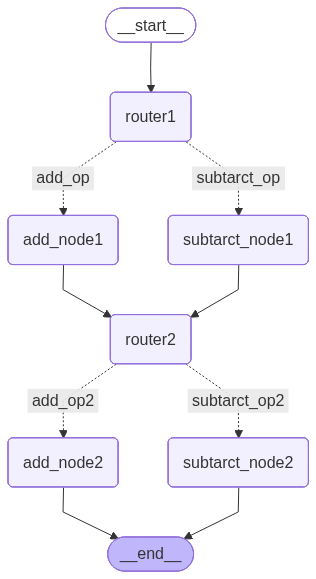

{'num1': 10, 'num2': 5, 'op1': '-', 'num3': 7, 'num4': 2, 'op2': '+', 'res1': 5, 'res2': 9}


In [4]:
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))


initial_state = AgentState(num1 = 10, op1="-", num2 = 5, num3 = 7, num4=2, op2="+", res1= 0, res2 = 0)
print(app.invoke(initial_state))